In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.5,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y]) # horizontal vector develop
x = np.hstack([x,-x])  # horizontal vector develop

In [3]:
y

array([  9.98749218,   9.99011857,   9.99243541,   9.9944429 ,
         9.99614123,   9.99753056,   9.99861101,   9.9993827 ,
         9.99984568,  10.        ,   9.99984568,   9.9993827 ,
         9.99861101,   9.99753056,   9.99614123,   9.9944429 ,
         9.99243541,   9.99011857,   9.98749218,   9.98455598,
         9.98130969,   9.97775303,   9.97388566,   9.9697072 ,
         9.96521729,   9.96041548,   9.95530134,   9.94987437,
         9.94413407,   9.9380799 ,   9.93171128,   9.9250276 ,
         9.91802823,   9.9107125 ,   9.90307971,   9.89512912,
         9.88685997,   9.87827145,   9.86936274,   9.86013297,
         9.85058123,   9.84070659,   9.83050807,   9.81998466,
         9.80913532,   9.79795897,   9.78645448,   9.7746207 ,
         9.76245643,   9.74996043,   9.73713143,   9.7239681 ,
         9.71046909,   9.69663299,   9.68245837,   9.66794372,
         9.65308753,   9.6378882 ,   9.62234411,   9.60645359,
         9.59021492,   9.57362632,   9.55668598,   9.53

In [4]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

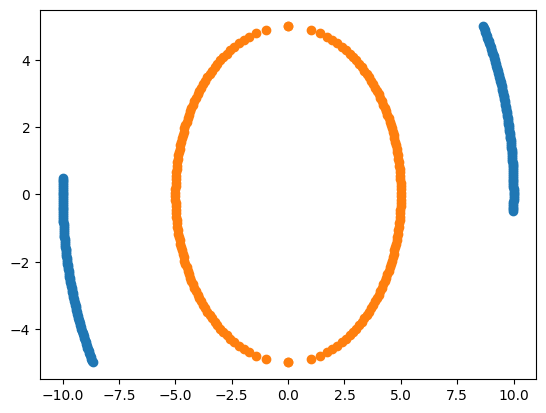

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [6]:
np.vstack([y,x]).T  # tranpose matrix jonno vstack create korbo

array([[  9.98749218,  -0.5       ],
       [  9.99011857,  -0.44444444],
       [  9.99243541,  -0.38888889],
       [  9.9944429 ,  -0.33333333],
       [  9.99614123,  -0.27777778],
       [  9.99753056,  -0.22222222],
       [  9.99861101,  -0.16666667],
       [  9.9993827 ,  -0.11111111],
       [  9.99984568,  -0.05555556],
       [ 10.        ,   0.        ],
       [  9.99984568,   0.05555556],
       [  9.9993827 ,   0.11111111],
       [  9.99861101,   0.16666667],
       [  9.99753056,   0.22222222],
       [  9.99614123,   0.27777778],
       [  9.9944429 ,   0.33333333],
       [  9.99243541,   0.38888889],
       [  9.99011857,   0.44444444],
       [  9.98749218,   0.5       ],
       [  9.98455598,   0.55555556],
       [  9.98130969,   0.61111111],
       [  9.97775303,   0.66666667],
       [  9.97388566,   0.72222222],
       [  9.9697072 ,   0.77777778],
       [  9.96521729,   0.83333333],
       [  9.96041548,   0.88888889],
       [  9.95530134,   0.94444444],
 

In [7]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns =['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2])
df.head(5)

,X1,X2,Y
0,9.987492,-0.500000,0
1,9.990119,-0.444444,0
2,9.992435,-0.388889,0
3,9.994443,-0.333333,0
4,9.996141,-0.277778,0


In [8]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [9]:
# Independent and Dependent features
X =df.iloc[:, :2]
y = df.Y

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,y,test_size=0.25,random_state=1)

In [12]:
ytrain

82     0
167    1
179    0
27     0
89     0
      ..
55     1
72     0
196    1
35     1
37     0
Name: Y, Length: 300, dtype: int64

Ploynomial Kernel

In [13]:
# we need to find components for the ploynomical kernel
#X1,X2,X1_square,X2_square,X1*x2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,9.987492,-0.500000,0,99.750000,0.250000,-4.993746
1,9.990119,-0.444444,0,99.802469,0.197531,-4.440053
2,9.992435,-0.388889,0,99.848765,0.151235,-3.885947
3,9.994443,-0.333333,0,99.888889,0.111111,-3.331481
4,9.996141,-0.277778,0,99.922840,0.077160,-2.776706


In [14]:
# Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']


In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)
xtrain

,X1,X2,X1_Square,X2_Square,X1*X2
82,9.140704,4.055556,83.552469,16.447531,37.070633
167,-4.677106,-1.767677,21.875319,3.124681,8.267611
179,-9.212847,-3.888889,84.876543,15.123457,35.827737
27,9.949874,1.000000,99.000000,1.000000,9.949874
89,8.958064,4.444444,80.246914,19.753086,39.813619
...,...,...,...,...,...
55,4.969040,0.555556,24.691358,0.308642,2.760578
72,9.367497,3.500000,87.750000,12.250000,32.786239
196,-1.714198,-4.696970,2.938476,22.061524,8.051537
35,4.780671,-1.464646,22.854811,2.145189,-7.001992


In [16]:
import plotly.express as px
fig = px.scatter_3d(df,x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [18]:
fig = px.scatter_3d(df,x='X1_Square',y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
accuracy_score(ytest,y_pred)

1.0

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
accuracy_score(ytest,y_pred)

1.0

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
accuracy_score(ytest,y_pred)

1.0

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
accuracy_score(ytest,y_pred)

1.0